In [1]:
import numpy as np
from tifffile import imread, imsave, imwrite
from glob import glob
import random
import tqdm
from matplotlib import pyplot as plt
from sklearn.feature_extraction import image
import os

In [2]:
default_dir = './data/'
dataset_dir = './data/b2u_g123_first/'
gt_dir = './data/cvat_g123/'



In [3]:
X = sorted(os.listdir(dataset_dir))
Y = sorted(os.listdir(gt_dir ))

print(f'X:\n{X}\nY:\n{Y}')

X:
['Tile_001-001-000_0-000.png', 'Tile_001-002-000_0-000.png', 'Tile_001-003-000_0-000.png', 'Tile_001-004-000_0-000.png', 'Tile_001-005-000_0-000.png', 'Tile_001-006-000_0-000.png', 'Tile_001-007-000_0-000.png', 'Tile_001-008-000_0-000.png', 'Tile_001-009-000_0-000.png', 'Tile_001-010-000_0-000.png', 'Tile_001-011-000_0-000.png', 'Tile_001-012-000_0-000.png', 'Tile_001-013-000_0-000.png', 'Tile_001-014-000_0-000.png', 'Tile_001-015-000_0-000.png']
Y:
['Tile_001-001-000_0-000.png', 'Tile_001-002-000_0-000.png', 'Tile_001-003-000_0-000.png']


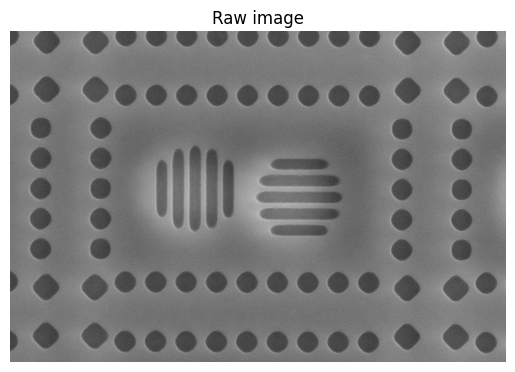

In [5]:
x = plt.imread(os.path.join(dataset_dir, X[9]))
plt.imshow(x,cmap='gray')
plt.axis('off')
plt.title('Raw image')
plt.show()

In [6]:
rng = np.random.RandomState(42)

ind_test = random.sample(range(len(Y)), 1)

ind_pretrn_x = [i for i in range(len(X))]
ind_pretrn_y = [i for i in range(len(Y))]

print(f'ind_pretr x and y= {ind_pretrn_x, ind_pretrn_y}\nind_test = {ind_test}')


X_test, Y_test = [plt.imread(os.path.join(dataset_dir, X[i])) for i in ind_test] , [plt.imread(os.path.join(gt_dir, Y[i])) for i in ind_test]
X_pretrn = [plt.imread(os.path.join(dataset_dir, X[i])) for i in ind_pretrn_x if i not in ind_test]
Y_pretrn = [plt.imread(os.path.join(gt_dir, Y[i])) for i in ind_pretrn_y if i not in ind_test]
print('number of images: %3d' % len(X))
print('- training+validation:       %3d' % len(X_pretrn))
print('- test:     %3d' % len(X_test))

ind_pretr x and y= ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [0, 1, 2])
ind_test = [2]
number of images:  15
- training+validation:        14
- test:       1


In [7]:
X_test_names = sorted([X[i] for i in ind_test])
Y_test_names = sorted([Y[i] for i in ind_test])

X_pretrn_names = sorted([X[i] for i in ind_pretrn_x if i not in ind_test])
Y_pretrn_names = sorted([Y[i] for i in ind_pretrn_y if i not in ind_test])
print(f'X test names: {X_test_names}\nY test names: {Y_test_names}')
print(f'X pretrn names: {X_pretrn_names}\nY pretrn names: {Y_pretrn_names}')

X test names: ['Tile_001-003-000_0-000.png']
Y test names: ['Tile_001-003-000_0-000.png']
X pretrn names: ['Tile_001-001-000_0-000.png', 'Tile_001-002-000_0-000.png', 'Tile_001-004-000_0-000.png', 'Tile_001-005-000_0-000.png', 'Tile_001-006-000_0-000.png', 'Tile_001-007-000_0-000.png', 'Tile_001-008-000_0-000.png', 'Tile_001-009-000_0-000.png', 'Tile_001-010-000_0-000.png', 'Tile_001-011-000_0-000.png', 'Tile_001-012-000_0-000.png', 'Tile_001-013-000_0-000.png', 'Tile_001-014-000_0-000.png', 'Tile_001-015-000_0-000.png']
Y pretrn names: ['Tile_001-001-000_0-000.png', 'Tile_001-002-000_0-000.png']


In [8]:
test_img_dir = os.path.join(default_dir, 'test/images/')
test_gt_dir = os.path.join(default_dir, 'test/gt/')

os.makedirs(test_img_dir, exist_ok=True)
os.makedirs(test_gt_dir, exist_ok=True)

for i in range(len(X_test)):
    imsave(test_img_dir + X_test_names[i][:-4]+'.tif', X_test[i])
    imsave(test_gt_dir + Y_test_names[i][:-4]+'.tif', Y_test[i])

/tmp/ipykernel_92462/3103662851.py:8: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(test_img_dir + X_test_names[i][:-4]+'.tif', X_test[i])
/tmp/ipykernel_92462/3103662851.py:9: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  imsave(test_gt_dir + Y_test_names[i][:-4]+'.tif', Y_test[i])


In [9]:
patches_img_dir = os.path.join(default_dir, 'patches/images/')
patches_gt_dir = os.path.join(default_dir, 'patches/gt/')

os.makedirs(patches_img_dir, exist_ok=True)
os.makedirs(patches_gt_dir, exist_ok=True)

count =0
for i in range(len(X_pretrn)):
    patchesimages = image.extract_patches_2d(X_pretrn[i], patch_size=(512,512), max_patches=100, random_state=42)

    for j in range(patchesimages.shape[0]):
        imwrite(patches_img_dir + X_pretrn_names[i][:-4] + str(count).zfill(4)+'.tif', patchesimages[j])
        count+=1

count = 0
for i in range(len(Y_pretrn)):
    patchesmasks = image.extract_patches_2d(Y_pretrn[i], patch_size=(512,512), max_patches=100, random_state=42)

    for j in range(patchesmasks.shape[0]):
        imwrite(patches_gt_dir + Y_pretrn_names[i][:-4] + str(count).zfill(4)+'.tif', patchesmasks[j])
        count+=1

In [10]:
X_pretrn= sorted(glob(os.path.join(patches_img_dir, '*.tif')))
Y_pretrn= sorted(glob(os.path.join(patches_gt_dir, '*.tif')))

In [11]:
X_test = sorted(glob(os.path.join(test_img_dir, '*.tif')))
Y_test = sorted(glob(os.path.join(test_gt_dir, '*.tif')))

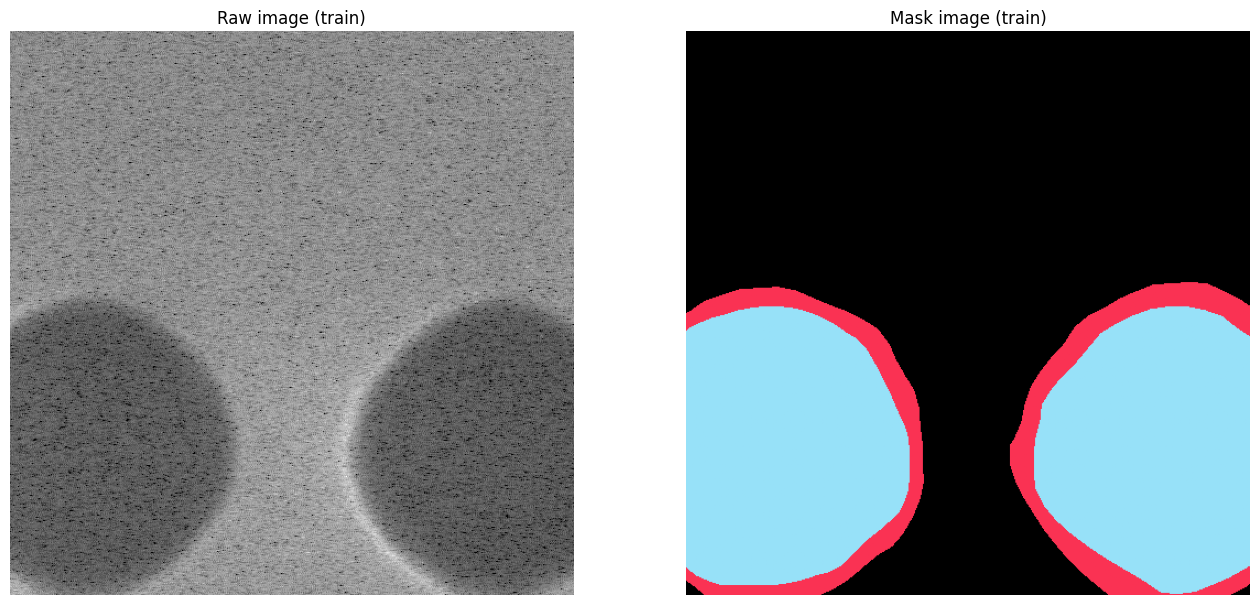

0.0 0.59607846
0.0 0.98039216


In [14]:
i = 9
img, lbl = imread(X_pretrn[i]), imread(Y_pretrn[i])
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image (train)')
plt.subplot(122); plt.imshow(lbl,cmap='gray');   plt.axis('off'); plt.title('Mask image (train)')
plt.show()
print(np.min(img),np.max(img))
print(np.min(lbl),np.max(lbl))

In [15]:
print('- training+validation:       %3d' % len(X_pretrn))
print('- test:     %3d' % len(X_test))

- training+validation:       1400
- test:       1


разобраться с train и val

In [16]:
x_pretr_names = sorted(os.listdir(patches_img_dir))
y_pretr_names = sorted(os.listdir(patches_gt_dir))

In [20]:
n_val = random.sample(range(len(Y_pretrn)), 5)
ind_x = [i for i in range(len(x_pretr_names)) if i not in n_val]
ind_y = [i for i in range(len(y_pretr_names)) if i not in n_val]

print(f'n_val = {n_val}\nx_val_names: {[x_pretr_names[i] for i in n_val]}\ny_val_names: {[y_pretr_names[i] for i in n_val]}')

X_val = [imread(os.path.join(patches_img_dir, x_pretr_names[i])) for i in n_val]
Y_val = [imread(os.path.join(patches_img_dir, y_pretr_names[i])) for i in n_val]

print(f'len x val = {len(X_val)}\nlen y val: {len(Y_val)}')

X_train = [imread(os.path.join(patches_img_dir, x_pretr_names[i])) for i in ind_x if i not in n_val]
Y_train = [imread(os.path.join(patches_gt_dir, y_pretr_names[i])) for i in ind_y if i not in n_val]

print(f'len x train = {len(X_train)}\nlen y train: {len(Y_train)}')

n_val = [159, 107, 53, 74, 170]
x_val_names: ['Tile_001-002-000_0-0000159.tif', 'Tile_001-002-000_0-0000107.tif', 'Tile_001-001-000_0-0000053.tif', 'Tile_001-001-000_0-0000074.tif', 'Tile_001-002-000_0-0000170.tif']
y_val_names: ['Tile_001-002-000_0-0000159.tif', 'Tile_001-002-000_0-0000107.tif', 'Tile_001-001-000_0-0000053.tif', 'Tile_001-001-000_0-0000074.tif', 'Tile_001-002-000_0-0000170.tif']
len x val = 5
len y val: 5
len x train = 1395
len y train: 195


In [21]:
print('- training:       %3d' % len(X_train))
print('- validation:     %3d' % len(X_val))
print('- test:     %3d' % len(X_test))

- training:       1395
- validation:       5
- test:       1


In [22]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_val = np.array(X_val)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
Y_val = np.array(Y_val)

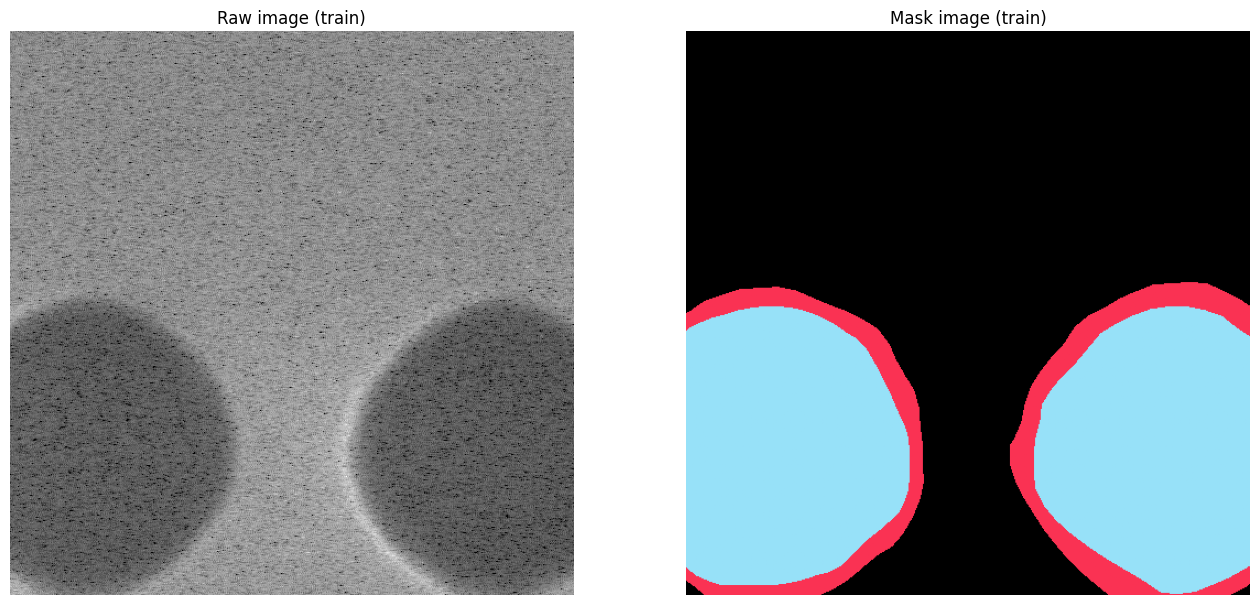

0.0 0.59607846
0.0 0.98039216


In [23]:
i = 9
img, lbl = X_train[i], Y_train[i]
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image (train)')
plt.subplot(122); plt.imshow(lbl,cmap='gray');   plt.axis('off'); plt.title('Mask image (train)')
plt.show()
print(np.min(img),np.max(img))
print(np.min(lbl),np.max(lbl))

In [24]:
train_dir = os.path.join(default_dir, 'train/')
test_dir = os.path.join(default_dir, 'test/')

os.makedirs(train_dir, exist_ok=True)

In [25]:
np.savez_compressed(os.path.join(train_dir, 'train_data.npz'), X_train=X_train, Y_train=Y_train, X_val=X_val, Y_val=Y_val)
np.savez_compressed(os.path.join(test_dir, 'test_data.npz'), X_test=X_test, Y_test=Y_test)